In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 10.8MB/s 
     |████████████████████████████████| 194kB 24.4MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 1.2MB 13.6MB/s 
     |████████████████████████████████| 12.8MB 192kB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

[[chapter_intro]]

In [3]:
%cd /content/gdrive/MyDrive/Colab Notebooks/github_repos/fastbook

/content/gdrive/MyDrive/Colab Notebooks/github_repos/fastbook


In [4]:
%pwd

'/content/gdrive/MyDrive/Colab Notebooks/github_repos/fastbook'

Click on the cell that begins with the line "# CLICK ME" to select it. The first character in that line indicates that what follows is a comment in Python, so it is ignored when executing the cell. The rest of the cell is, believe it or not, a complete system for creating and training a state-of-the-art model for recognizing cats versus dogs. So, let's train it now! To do so, just press Shift-Enter on your keyboard, or press the Play button on the toolbar. Then wait a few minutes while the following things happen:

1. A dataset called the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) that contains 7,349 images of cats and dogs from 37 different breeds will be downloaded from the fast.ai datasets collection to the GPU server you are using, and will then be extracted.
2. A *pretrained model* that has already been trained on 1.3 million images, using a competition-winning model will be downloaded from the internet.
3. The pretrained model will be *fine-tuned* using the latest advances in transfer learning, to create a model that is specially customized for recognizing dogs and cats.

The first two steps only need to be run once on your GPU server. If you run the cell again, it will use the dataset and model that have already been downloaded, rather than downloading them again. Let's take a look at the contents of the cell, and the results (<<first_training>>):

In [5]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.167973,0.030973,0.007442,01:36


epoch,train_loss,valid_loss,error_rate,time
0,0.040073,0.020640,0.007442,02:14


You will probably not see exactly the same results that are in the book. There are a lot of sources of small random variation involved in training models. We generally see an error rate of well less than 0.02 in this example, however.

So, how do we know if this model is any good? In the last column of the table you can see the error rate, which is the proportion of images that were incorrectly identified. The error rate serves as our metric—our measure of model quality, chosen to be intuitive and comprehensible. As you can see, the model is nearly perfect, even though the training time was only a few seconds (not including the one-time downloading of the dataset and the pretrained model). In fact, the accuracy you've achieved already is far better than anybody had ever achieved just 10 years ago!

Finally, let's check that this model actually works. Go and get a photo of a dog, or a cat; if you don't have one handy, just search Google Images and download an image that you find there. Now execute the cell with `uploader` defined. It will output a button you can click, so you can select the image you want to classify:

In [6]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

<img alt="An upload button" width="159" id="upload" src="https://github.com/bryansd9686/fastbook/blob/master/images/att_00008.png?raw=1">

Now you can pass the uploaded file to the model. Make sure that it is a clear photo of a single dog or a cat, and not a line drawing, cartoon, or similar. The notebook will tell you whether it thinks it is a dog or a cat, and how confident it is. Hopefully, you'll find that your model did a great job:

In [8]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


Deep learning's effectiveness for classifying images has been widely discussed in recent years, even showing _superhuman_ results on complex tasks like recognizing malignant tumors in CT scans. But it can do a lot more than this, as we will show here.

For instance, let's talk about something that is critically important for autonomous vehicles: localizing objects in a picture. If a self-driving car doesn't know where a pedestrian is, then it doesn't know how to avoid one! Creating a model that can recognize the content of every individual pixel in an image is called *segmentation*. Here is how we can train a segmentation model with fastai, using a subset of the [*Camvid* dataset](http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf) from the paper "Semantic Object Classes in Video: A High-Definition Ground Truth Database" by Gabruel J. Brostow, Julien Fauqueur, and Roberto Cipolla:

In [9]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.070459,2.550067,00:04


epoch,train_loss,valid_loss,time
0,1.995870,1.544475,00:04
1,1.673137,1.249124,00:04
2,1.479060,1.219122,00:04
3,1.325322,0.866994,00:04
4,1.177137,0.759355,00:04
5,1.054415,0.726330,00:04
6,0.958761,0.684545,00:04
7,0.883450,0.680943,00:04


We are not even going to walk through this code line by line, because it is nearly identical to our previous example! (Although we will be doing a deep dive into segmentation models in <<chapter_arch_details>>, along with all of the other models that we are briefly introducing in this chapter, and many, many more.)

We can visualize how well it achieved its task, by asking the model to color-code each pixel of an image. As you can see, it nearly perfectly classifies every pixel in every object. For instance, notice that all of the cars are overlaid with the same color and all of the trees are overlaid with the same color (in each pair of images, the lefthand image is the ground truth label and the right is the prediction from the model):

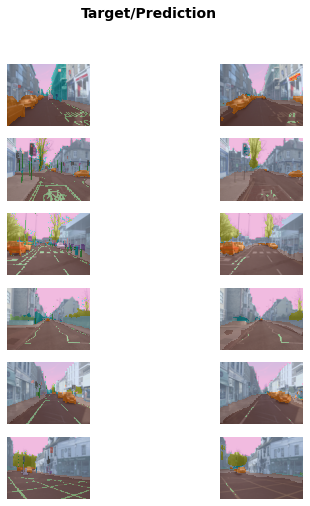

In [10]:
learn.show_results(max_n=6, figsize=(7,8))

One other area where deep learning has dramatically improved in the last couple of years is natural language processing (NLP). Computers can now generate text, translate automatically from one language to another, analyze comments, label words in sentences, and much more. Here is all of the code necessary to train a model that can classify the sentiment of a movie review better than anything that existed in the world just five years ago:

In [11]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.461604,0.408644,0.814680,07:40


epoch,train_loss,valid_loss,accuracy,time
0,0.313396,0.248575,0.900760,14:58
1,0.242590,0.214285,0.914680,14:56
2,0.184601,0.204281,0.923240,14:58
3,0.156928,0.205845,0.926480,14:58


This model is using the ["IMDb Large Movie Review dataset"](https://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf) from the paper "Learning Word Vectors for Sentiment Analysis" by Andrew Maas et al. It works well with movie reviews of many thousands of words, but let's test it out on a very short one to see how it does its thing:

In [12]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([7.0506e-06, 9.9999e-01]))

Here we can see the model has considered the review to be positive. The second part of the result is the index of "pos" in our data vocabulary and the last part is the probabilities attributed to each class (99.6% for "pos" and 0.4% for "neg"). 

Now it's your turn! Write your own mini movie review, or copy one from the internet, and you can see what this model thinks about it. 

> jargon: Tabular: Data that is in the form of a table, such as from a spreadsheet, database, or CSV file. A tabular model is a model that tries to predict one column of a table based on information in other columns of the table.

It turns out that looks very similar too. Here is the code necessary to train a model that will predict whether a person is a high-income earner, based on their socioeconomic background:

In [13]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

As you see, we had to tell fastai which columns are *categorical* (that is, contain values that are one of a discrete set of choices, such as `occupation`) and which are *continuous* (that is, contain a number that represents a quantity, such as `age`).

There is no pretrained model available for this task (in general, pretrained models are not widely available for any tabular modeling tasks, although some organizations have created them for internal use), so we don't use `fine_tune` in this case. Instead we use `fit_one_cycle`, the most commonly used method for training fastai models *from scratch* (i.e. without transfer learning):

In [14]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.358576,0.358227,0.833538,00:07
1,0.354273,0.345549,0.838913,00:07
2,0.341162,0.342091,0.843827,00:07


This model is using the [*Adult* dataset](http://robotics.stanford.edu/~ronnyk/nbtree.pdf), from the paper "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid" by Rob Kohavi, which contains some demographic data about individuals (like their education, marital status, race, sex, and whether or not they have an annual income greater than \$50k). The model is over 80\% accurate, and took around 30 seconds to train.

Let's look at one more. Recommendation systems are very important, particularly in e-commerce. Companies like Amazon and Netflix try hard to recommend products or movies that users might like. Here's how to train a model that will predict movies people might like, based on their previous viewing habits, using the [MovieLens dataset](https://doi.org/10.1145/2827872):

In [15]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.502626,1.436104,00:00


epoch,train_loss,valid_loss,time
0,1.354461,1.375152,00:00
1,1.248513,1.186878,00:00
2,1.005707,0.874296,00:00
3,0.795088,0.737238,00:00
4,0.682730,0.704470,00:00
5,0.642642,0.695310,00:00
6,0.620968,0.690554,00:00
7,0.615781,0.689420,00:00
8,0.602483,0.688677,00:00
9,0.611634,0.688576,00:00


This model is predicting movie ratings on a scale of 0.5 to 5.0 to within around 0.6 average error. Since we're predicting a continuous number, rather than a category, we have to tell fastai what range our target has, using the `y_range` parameter.

Although we're not actually using a pretrained model (for the same reason that we didn't for the tabular model), this example shows that fastai lets us use `fine_tune` anyway in this case (you'll learn how and why this works in <<chapter_pet_breeds>>). Sometimes it's best to experiment with `fine_tune` versus `fit_one_cycle` to see which works best for your dataset.

We can use the same `show_results` call we saw earlier to view a few examples of user and movie IDs, actual ratings, and predictions:

In [16]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,19.0,26.0,4.5,4.054209
1,8.0,90.0,3.0,4.375954
2,81.0,2.0,3.5,3.326896
3,48.0,25.0,2.0,3.777259
4,83.0,67.0,4.0,3.927464
5,33.0,97.0,4.0,3.907926
6,27.0,9.0,4.0,3.546902
7,45.0,38.0,2.0,3.315236
8,38.0,7.0,5.0,4.670257
